# 1. Feedforward: Building a ReLU neural net-work
Consider the rectified linear activation function : $h_j = max(0, a_j )$.

### 1. Draw a network with:
2 inputs; 
1 hidden layers with 3 hidden units;
1-class output (for binary classification)

 <img src="hw2_pic1_1.jpg" style="width:400px;height:400px"/>

### 2. Write out the mathematical equation for the output of this network (feel free to break the input-output relationship into multiple equations).

 <img src="hw2_pic1_2.jpg" style="width:400px;height:400px"/>

### 3. Write out the forward-pass function in python, call it $ff\_nn\_ReLu(...)$

In [1]:
import numpy as np
%matplotlib inline

In [2]:
def ReLu(x):
    return (x>0)*x
def sigmoid(z):
    return 1/(1+np.exp(-z))
def ff_nn__ReLu(X, W, b, V, c):
    # returns model prediction 
    h = ReLu(np.dot(X,W) + b)
    y = sigmoid(np.dot(h,V) + c)
    return y

### 4. what are the class probabilities associated with the forward pass of each sample?

In [3]:
X = np.array([[1,-1],[0,-1],[0,1]])
W = np.array([[1,-1,0],[0,0,0.5]])
V = np.array([1, 0, -1])
b = np.array([0, 0, 1])
c = np.array([1])

In [4]:
# The class probabilities associated with the forward pass of each of the three samples
ff_nn__ReLu(X, W, b, V, c)

array([0.81757448, 0.62245933, 0.37754067])

# 2. Gradient Descent
Consider a simple non-convex function of two variables:
$$f(x, y) = (1 - x^3) + 100 * (y^2 - x)^2$$

### 1. What are the partial derivatives of f with respect to x and to y?

The partial derivative of f with respect to x<p>
$$
{\partial f \over \partial x} = -3x^2+200x-200y^2
$$
The partial derivative of f with respect to y<p>
$$
{\partial f \over \partial y} = 400y^3-400xy
$$

### 2. Create a visualization of the contours of this function.

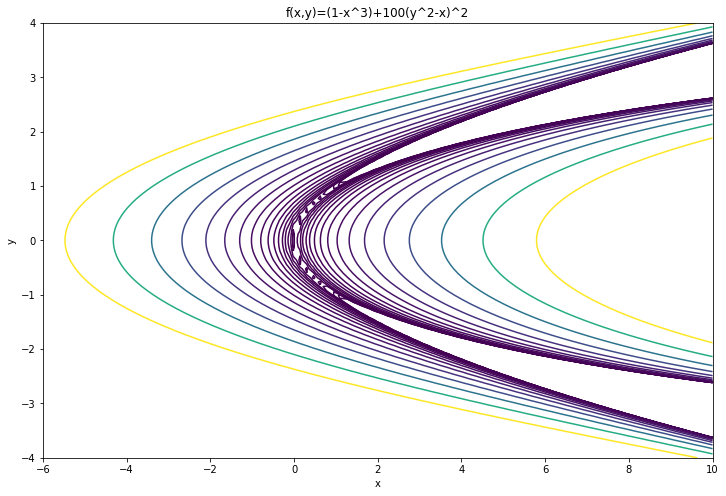

In [5]:
import numpy as np
import matplotlib.pyplot as plt

#Plot of Rosenbrock's banana function: f(x,y)=(1-x^3)+100(y^2-x)^2

rosenbrockfunction = lambda x,y: (1-x**3)+100*(y**2-x)**2

n = 100 # number of discretization points along the x-axis
m = 100 # number of discretization points along the y-axis
a=-6; b=10 # extreme points in the x-axis
c=-4; d=4 # extreme points in the y-axis

X,Y = np.meshgrid(np.linspace(a,b,n), np.linspace(c,d,m))

Z = rosenbrockfunction(X,Y)

plt.figure(figsize = (12,8))
plt.contour(X,Y,Z,np.logspace(-0.5,3.5,20,40, base=10))

plt.title('f(x,y)=(1-x^3)+100(y^2-x)^2')
plt.xlabel('x')
plt.ylabel('y')

plt.show()

### 3. Write a Gradient Descent algorithm for finding the minimum of the function. Visualize your results with a few diffierent learning rates.

In [12]:
def grad_f(vector):
    x, y = vector
    df_dx = -3*x**2+200*x-200*y**2
    df_dy = 400*y**3-400*x*y
    return np.array([df_dx, df_dy])
def gradient_descent(starting_point = None, learning_rate = 0.0005, iterations = 10000):
    if starting_point:
        point = starting_point
    else:
        point = np.array([2,0])
    trajectory = [point]
    for i in range(iterations):
        grad = grad_f(point)
        point = point - learning_rate * grad
        #print('grad', grad)
        #print('point',point)
        trajectory.append(point)
    return(np.array(trajectory))

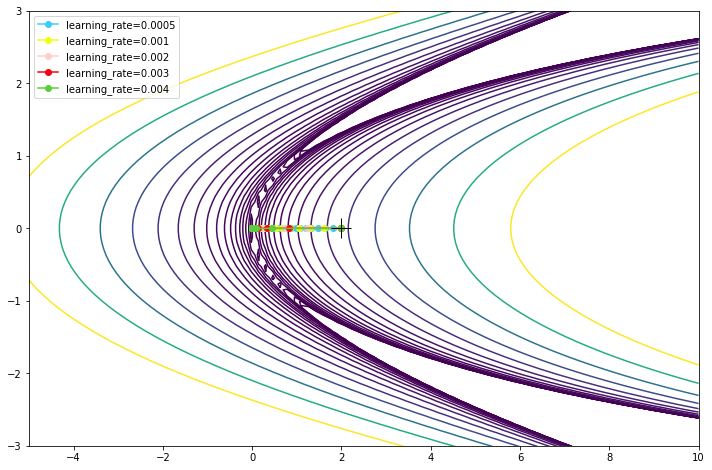

In [13]:
np.random.seed(1)
traj1 = gradient_descent()
np.random.seed(1)
traj2 = gradient_descent(learning_rate = 0.001)
np.random.seed(1)
traj3 = gradient_descent(learning_rate = 0.002)
np.random.seed(1)
traj4 = gradient_descent(learning_rate = 0.003)
np.random.seed(1)
traj5 = gradient_descent(learning_rate = 0.004)

fig, ax = plt.subplots(figsize = (12,8))
ax.set_xlim([-5, 10])
ax.set_ylim([-3,3])
CS = ax.contour(X,Y,Z,np.logspace(-0.5,3.5,20,40, base=10))
plt.plot(traj1[:,0], traj1[:,1], '-o', color = '#3ACDFA', label = 'learning_rate=0.0005')
plt.plot(traj2[:,0], traj2[:,1], '-o', color = '#F1FF13', label = 'learning_rate=0.001')
plt.plot(traj3[:,0], traj2[:,1], '-o', color = '#FFCECD', label = 'learning_rate=0.002')
plt.plot(traj4[:,0], traj3[:,1], '-o', color = '#FA0111', label = 'learning_rate=0.003')
plt.plot(traj5[:,0], traj4[:,1], '-o', color = '#5ACE3C', label = 'learning_rate=0.004')
plt.plot(2, 0, "+", color = 'black', markersize = 20)
plt.legend(loc = 'upper left')

### 4. Write a Gradient Descent With Momentum algorithm for finding the minimum. Visualize your results with a few different settings of the algorithm's hyperparameters.

In [16]:
def grad_descent_with_momentum(starting_point=None, iterations=10, epsilon=0.0005, alpha = 0.7):
    if starting_point:
        point = starting_point
    else:
        point = np.array([2,0])
        #point = np.array([np.random.uniform(-4,4,size=1)[0], np.random.uniform(-1,1,size=1)[0]])
    #print(point)
    trajectory = [point]
    v = np.zeros(point.size)
    for i in range(iterations):
        grad = grad_f(point)
        v = alpha*v + epsilon*grad
        point = point - v
        trajectory.append(point)
    return np.array(trajectory)

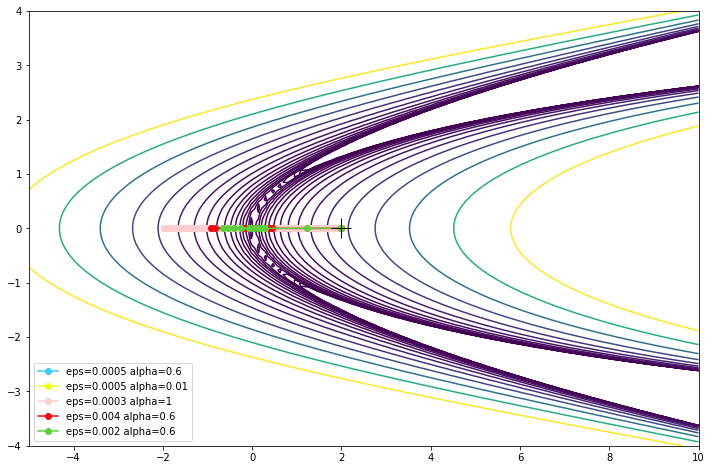

In [17]:
np.random.seed(1)
traj1 = grad_descent_with_momentum(iterations=10000, epsilon=0.0005, alpha=0.6)
np.random.seed(1)
traj2 = grad_descent_with_momentum(iterations=10000, epsilon=0.0005, alpha=0.01)
np.random.seed(1)
traj3 = grad_descent_with_momentum(iterations=10000, epsilon=0.0003, alpha=1)
np.random.seed(1)
traj4 = grad_descent_with_momentum(iterations=10000, epsilon=0.004, alpha=0.6)
np.random.seed(1)
traj5 = grad_descent_with_momentum(iterations=10000, epsilon=0.002, alpha=0.6)

fig, ax = plt.subplots(figsize = (12,8))
ax.set_xlim([-5,10])
ax.set_ylim([-4,4])
CS = ax.contour(X, Y, Z,np.logspace(-0.5,3.5,20,40, base=10))
plt.plot(traj1[:,0], traj1[:,1], '-o', color = '#3ACDFA', label = 'eps=0.0005 alpha=0.6')
plt.plot(traj2[:,0], traj2[:,1], '-o', color = '#F1FF13', label = 'eps=0.0005 alpha=0.01')
plt.plot(traj3[:,0], traj3[:,1], '-o', color = '#FFCECD', label = 'eps=0.0003 alpha=1')
plt.plot(traj4[:,0], traj4[:,1], '-o', color = '#FA0111', label = 'eps=0.004 alpha=0.6')
plt.plot(traj5[:,0], traj4[:,1], '-o', color = '#5ACE3C', label = 'eps=0.002 alpha=0.6')
plt.plot(2, 0, '+', color = 'black', markersize = 20)
plt.legend(loc = 'lower left')

# 3. Backprop

### 1. For the same network as in Question 1, derive expressions of the gradient of the Loss function with respect to each of the model parameters.

 <img src="hw2_pic3_1.jpg" style="width:600px;height:400px"/>

### 2. Write a function $grad\_f(...)$ that takes in a weights vector and returns the gradient of the Loss at that location.

In [12]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

def grad_f(y,x,w,b,v,c):
    h = np.dot(w.T,x)+b
    a = np.where(h<0,0,h)
    z = np.dot(a.T,v)+c
    yhat = sigmoid(z)
    
    # dl/dv
    dv = (-y/yhat+(1-y)/(1-yhat))*yhat*(1-yhat)*a
    
    # dl/dc
    dc = (-y/yhat+(1-y)/(1-yhat))*yhat*(1-yhat)
    
    dw = np.zeros(shape=(3,2))
    db = np.zeros(shape=(3,1))
    
    # whether h[j]>0, if h[j]<0, dwj=0
    for j in range(0,3):
        if h[j]<0:
            dw[j][0] = dw[j][1] =db[j]=0
            
        else:
            dw[j] = (-y/yhat+(1-y)/(1-yhat))*yhat*(1-yhat)*v[j]*x
            db[j] = (-y/yhat+(1-y)/(1-yhat))*yhat*(1-yhat)*v[j]
            
    return dv,dc,dw.T,db.T

In [13]:
w = np.array([[1,-1,0],[0,0,0.5]])
b = np.array([0,0,1])
v = np.array([1,0,-1])
c = np.array([1])
x = np.array([1,-1])
dv,dc,dw,db =  grad_f(1,x,w,b,v,c)

In [14]:
dv,dc,dw,db

(array([-0.18242552, -0.        , -0.09121276]),
 array([-0.18242552]),
 array([[-0.18242552,  0.        ,  0.18242552],
        [ 0.18242552,  0.        , -0.18242552]]),
 array([[-0.18242552,  0.        ,  0.18242552]]))

### 3. Generate a synthetic dataset like the XOR pattern (see below).

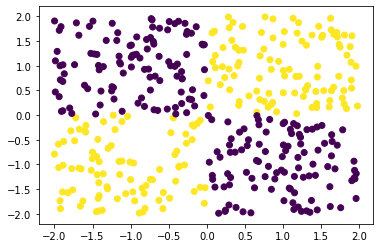

In [15]:
N=400
np.random.seed(1)
x1 = np.random.uniform(-2,2,N*2).reshape(N,2)
# if xy<0, purple; otherwise yellow
z=[1]*N
for i in range(0,N):
    if x1[i][0]*x1[i][1]<0:
        z[i] = 0
plt.scatter(x1[:,0],x1[:,1],c=z)

### 4. Fit your network using Gradient Descent. Keep track of the total Loss at each iteration and plot the result.

In [16]:
def forward(y,x,w,b,v,c):
    z1 = np.dot(w.T,x)+b
    a1 = np.where(z1<0,0,z1)
    z2 = np.dot(a1.T,v)+c
    a2 = sigmoid(z2)
            
    return z1,a1,z2,a2

In [17]:
# binary loss function
def loss(y,yhat):
    return -y*np.log(yhat)-(1-y)*np.log(1-yhat)

In [18]:
def gradient_ann(y,X,w,b,v,c,lr,iterations):
    
    # used for storing the total loss for each iteration
    losses= []
  
    
    for i in range(0,iterations):
        # for each iteration, initializing the dw=db=dc=dv=0
        dw = np.zeros(shape=(3,2))
        db = np.zeros(shape=(3))
        dc = 0
        dv = np.zeros(shape=(3))
        
        # sum of the binary loss of each input xi
        sumloss = 0
        y_hat = [] # only for final usage
        
        # for each input (x,y), compute the partial derivative
        for m in range(0,len(y)):
            
            # do the forward
            h,a,z,yhat = forward(y[m],X[m],w,b,v,c)
            # add the loss
            sumloss += loss(y[m],yhat)
            
            # compute the partial derivative #
            
            # dl/dv
            dv += (-y[m]/yhat+(1-y[m])/(1-yhat))*yhat*(1-yhat)*a

            # dl/dc
            dc += (-y[m]/yhat+(1-y[m])/(1-yhat))*yhat*(1-yhat)

            # whether h[j]>0, if h[j]<0, dwj=0
            for j in range(0,3):
                if h[j]>0:
                    dw[j] +=  (-y[m]/yhat+(1-y[m])/(1-yhat))*yhat*(1-yhat)*v[j]*X[m]
                    db[j] +=  (-y[m]/yhat+(1-y[m])/(1-yhat))*yhat*(1-yhat)*v[j]
            
            # for final iteration use
            y_hat.append(yhat)
        
        # append to loss
        losses.append(sumloss)
        
        ### take the average of partial derivative, update the parameters 
        w = w-lr*dw.T/len(y)
        v = v-lr*dv/len(y)
        c= c-lr*dc/len(y)
        b= b-lr*db/len(y)
        #print(w,v,c,b)
    return losses,y_hat

In [19]:
# set the initial parameter
np.random.seed(1)
w = np.random.randn(6).reshape((2,3))
b = np.random.randn(3).reshape(3)
v = np.random.randn(3).reshape(3)
c=np.random.randn(1)
y = [1]*N
for i in range(0,N):
    if z[i]==1:
        y[i]=0
lr = 0.1
iterations=1000

In [20]:
losses,yhat =  gradient_ann(y,x1,w,b,v,c,lr,iterations)

Text(0, 0.5, 'Total Loss')

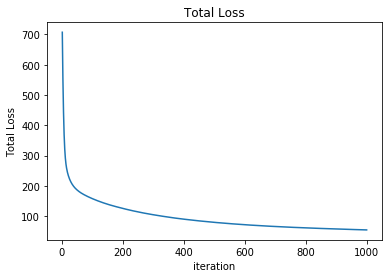

In [21]:
plt.plot(np.arange(1,iterations+1),losses)
plt.title('Total Loss')
plt.xlabel('iteration')
plt.ylabel('Total Loss')

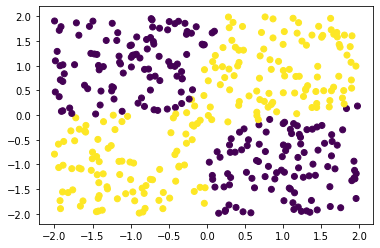

In [22]:
yclass=[0]*N
for i in range(0,N):
    if yhat[i]<0.5:
        yclass[i]= 1
plt.scatter(x1[:,0],x1[:,1],c=yclass)

### 5. Repeat the exercise above using Momentum. Comment on whether your algorithm seems to converge more efficiently.

In [23]:
def gradient_ann_m(y,X,w,b,v,c,alpha,eps,iterations):
    losses= []
    
    # d_now is the present parameter updates
    dw_now = np.zeros(shape=(3,2))
    db_now = np.zeros(shape=(3))
    dc_now = 0
    dv_now = np.zeros(shape=(3))  
    
    # for each iteration
    for i in range(0,iterations):
        
        dw = np.zeros(shape=(3,2))
        db = np.zeros(shape=(3))
        dc = 0
        dv = np.zeros(shape=(3))
        
        
        sumloss = 0
        y_hat = []
        for m in range(0,len(y)):
            
            h,a,z,yhat = forward(y[m],X[m],w,b,v,c)
            sumloss += loss(y[m],yhat)
            # dl/dv
            dv =dv+(-y[m]/yhat+(1-y[m])/(1-yhat))*yhat*(1-yhat)*a

            # dl/dc
            dc =dc+((-y[m]/yhat+(1-y[m])/(1-yhat))*yhat*(1-yhat))


            for j in range(0,3):
                if h[j]>0:
                    dw[j] =dw[j]+ ((-y[m]/yhat+(1-y[m])/(1-yhat))*yhat*(1-yhat)*v[j]*X[m])
                    db[j] =db[j]+ ((-y[m]/yhat+(1-y[m])/(1-yhat))*yhat*(1-yhat)*v[j])

            y_hat.append(yhat)
        
        losses.append(sumloss)
        
        # udpate d_now
        dw_now = alpha*dw_now+eps*dw/len(y)
        dv_now = alpha*dv_now+eps*dv/len(y)
        dc_now = alpha*dc_now+eps*dc/len(y)
        db_now = alpha*db_now+eps*db/len(y)
        
        # update parameter
        w = w-dw_now.T
        v = v-dv_now
        c= c-dc_now
        b= b-db_now
        
        #print(w,v,c,b)
    return losses,y_hat

In [24]:
eps=lr
alpha=0.5

losses2,yhat2 =  gradient_ann_m(y,x1,w,b,v,c,alpha,eps,iterations)

Text(0, 0.5, 'Total Loss')

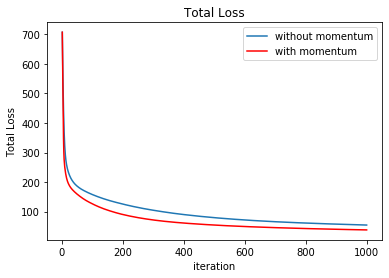

In [25]:
plt.plot(np.arange(1,iterations+1),losses,label='without momentum')
plt.plot(np.arange(1,iterations+1),losses2,label='with momentum',color = 'red')
plt.legend()
plt.title('Total Loss')
plt.xlabel('iteration')
plt.ylabel('Total Loss')

The gradient descent with momentum is more efficient when the learning rate keeps the same.

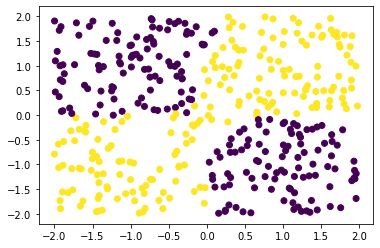

In [26]:
yclass2=[0]*N
for i in range(0,N):
    if yhat2[i]<0.5:
        yclass2[i]= 1
plt.scatter(x1[:,0],x1[:,1],c=yclass2)

### 6. Plot a visualization of the final decision boundary that your model has learned. Overlay the datapoints in this plot.

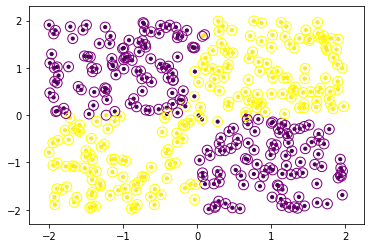

In [52]:
z=[1]*N
for i in range(0,N):
    if x1[i][0]*x1[i][1]<0:
        z[i] = 0
plt.scatter(x1[:,0],x1[:,1],c=z,s = 10)
yclass2=['purple']*N
for i in range(0,N):
    if yhat2[i]<0.5:
        yclass2[i]= 'yellow'
plt.scatter(x1[:,0],x1[:,1],c='', marker = 'o',edgecolors = yclass2, s=100)

As we can see, several edge points are mis-classified.